<a href="https://colab.research.google.com/github/Tushar-Pramanik/ATUPCorp./blob/master/TUSHAR_ANAND_ASSIGNMENT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear model predicts iPhone price in 2024 as: 159900.0
Quadratic model predicts iPhone price in 2024 as: 159899.99999999627
Exponential model predicts iPhone price in 2024 as: 166127.80192292252
R^2 value for Linear model is: 1.0
R^2 value for Quadratic model is: 1.0
R^2 value for Exponential model is: 0.9975791576073845
Looks like the Linear model is the best fit.
So, the iPhone 18 price in 2024 is estimated to be around ₹ 159900.0


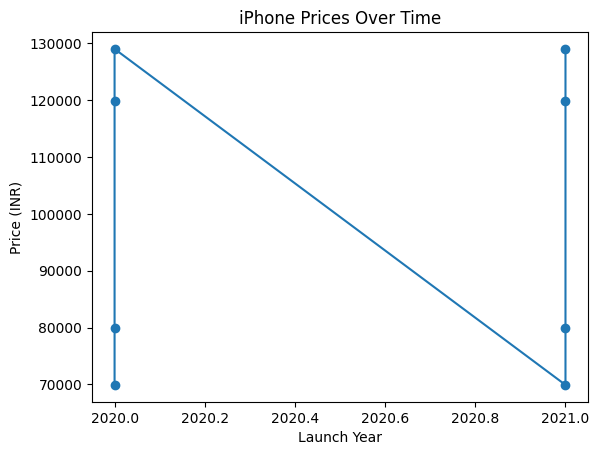

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Years and prices for the last few iPhones
years = np.array([2018, 2019, 2020, 2021, 2022]).reshape(-1, 1)
prices = np.array([99900, 109900, 119900, 129900, 139900])

# Set up the linear regression model
linear_model = LinearRegression()
linear_model.fit(years, prices)
linear_prediction = linear_model.predict([[2024]])[0]

# Set up the quadratic regression model
poly = PolynomialFeatures(degree=2)
years_poly = poly.fit_transform(years)
quadratic_model = LinearRegression()
quadratic_model.fit(years_poly, prices)
quadratic_prediction = quadratic_model.predict(poly.transform([[2024]]))[0]

# Define the exponential function and fit the model
def exponential_function(x, a, b):
    return a * np.exp(b * (x - 2018))

params, _ = curve_fit(exponential_function, years.flatten(), prices)
exponential_prediction = exponential_function(2024, *params)

# Calculate R^2 values for each model
linear_r2 = linear_model.score(years, prices)
quadratic_r2 = quadratic_model.score(years_poly, prices)

y_mean = np.mean(prices)
ss_total = np.sum((prices - y_mean) ** 2)
ss_residual = np.sum((prices - exponential_function(years.flatten(), *params)) ** 2)
exponential_r2 = 1 - (ss_residual / ss_total)

# Print out the results
print("Linear model predicts iPhone price in 2024 as:", linear_prediction)
print("Quadratic model predicts iPhone price in 2024 as:", quadratic_prediction)
print("Exponential model predicts iPhone price in 2024 as:", exponential_prediction)

print("R^2 value for Linear model is:", linear_r2)
print("R^2 value for Quadratic model is:", quadratic_r2)
print("R^2 value for Exponential model is:", exponential_r2)

# Choose the best model based on R^2 value
if linear_r2 >= quadratic_r2 and linear_r2 >= exponential_r2:
    print("Looks like the Linear model is the best fit.")
    best_prediction = linear_prediction
elif quadratic_r2 >= linear_r2 and quadratic_r2 >= exponential_r2:
    print("Quadratic model seems to be the best fit.")
    best_prediction = quadratic_prediction
else:
    print("The Exponential model takes the crown.")
    best_prediction = exponential_prediction

print("So, the iPhone 18 price in 2024 is estimated to be around ₹", best_prediction)

# Plotting the results (assuming you have a DataFrame named 'df')
plt.scatter(df['Launch Year'], df['Price (INR)'])
plt.plot(df['Launch Year'], df['Price (INR)'])
plt.xlabel('Launch Year')
plt.ylabel('Price (INR)')
plt.title('iPhone Prices Over Time')
plt.show()
